<a href="https://colab.research.google.com/github/kehkasha18/Projects/blob/main/ADABOOSTClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HolidayPackagePrediction using AdaBoost ( Same Problem statement as RandomForest Classifier )

In [35]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Travel.csv")

In [4]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
#Data cleaning
# check for missing values:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


In [6]:
# Identify columns with missing values
x = [features for features in df.columns if df[features].isnull().sum() >= 1]

# Loop through each column that has missing values
for feature in x: #Loops through each column stored in x.
    missing_percentage = np.round(df[feature].isnull().mean() * 100, 5)  # Calculate missing percentage
    print(feature,":", missing_percentage, "% missing values")  # Display feature name and missing %

Age : 4.62357 % missing values
TypeofContact : 0.51146 % missing values
DurationOfPitch : 5.13502 % missing values
NumberOfFollowups : 0.92062 % missing values
PreferredPropertyStar : 0.53191 % missing values
NumberOfTrips : 2.86416 % missing values
NumberOfChildrenVisiting : 1.35025 % missing values
MonthlyIncome : 4.76678 % missing values


In [7]:
# Imputing Null Values :
df.Age.fillna(df.Age.median(),inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

In [8]:
df.isnull().sum() #No null values after Imputation

,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0


In [9]:
# Since customer ID is not important , we will drop it
df.drop("CustomerID",inplace=True,axis=1)

In [10]:
# Checking for Class Imbalance in Categorical Features

# Display value counts for each categorical column with bold headings
for col in df.select_dtypes(include=['object']).columns:
    print(f"\033[1mFeature: {col}\033[0m")  # Bold text -\033[1m starts bold formatting. \033[0m resets formatting back to normal.
    print(df[col].value_counts(), "\n" + "-"*40 + "\n") #Adds separators ("-"*40) for better clarity between different columns.

Feature: TypeofContact
TypeofContact
Self Enquiry       3469
Company Invited    1419
Name: count, dtype: int64 
----------------------------------------

Feature: Occupation
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64 
----------------------------------------

Feature: Gender
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64 
----------------------------------------

Feature: ProductPitched
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64 
----------------------------------------

Feature: MaritalStatus
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64 
----------------------------------------

Feature: Designation
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                34

In [11]:
df["Gender"] = df["Gender"].replace("Fe male" , "Female")
df["MaritalStatus"] = df["MaritalStatus"].replace("single" , "unmarried")

In [12]:
print(df["Gender"].value_counts(),"\n")
print(df["MaritalStatus"].value_counts())

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64 

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64


In [13]:
df[x].select_dtypes(exclude="object").describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,37.547259,15.362930,3.711129,3.577946,3.229746,1.184738,23559.179419
std,9.104795,8.316166,0.998271,0.797005,1.822769,0.852323,5257.862921
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20485.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,43.000000,19.000000,4.000000,4.000000,4.000000,2.000000,25424.750000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [ ]:
# Feature Engineering
#Feature Extraction:

In [14]:
#create new column for feature
df["TotalVisits"] = df["NumberOfPersonVisiting"] + df["NumberOfChildrenVisiting"]
df.drop(["NumberOfPersonVisiting","NumberOfChildrenVisiting"],axis=1,inplace=True)

In [15]:
#Get all the Numerical Features
num_features = [feature for feature in df.columns if df[feature].dtype != "O"]
print( "Number of features :" , len(num_features))

Number of features : 12


In [16]:
#Get all the categorical Features:
cat_features = [feature for feature in df.columns if df[feature].dtype =="O"]
print("Number of features :" , len(cat_features))

Number of features : 6


In [17]:
#Get all the discrete features:
discrete_feature = [feature for feature in num_features if len(df[feature].unique())<25]
print("Number of discrete features :" , len(discrete_feature))

Number of discrete features : 9


In [18]:
#Get number of continous features :
continous_feature = [feature for feature in num_features if feature not in discrete_feature]
print("Number of continous features :" , len(continous_feature))

Number of continous features : 3


## **Feature Engineering Part 2**

### **Train Test Split and Model Training**

In [19]:
from sklearn.model_selection import train_test_split
x = df.drop(["ProdTaken"],axis = 1)
y = df["ProdTaken"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
x_train.shape , x_test.shape

((3910, 17), (978, 17))

### **Applying Transformations Using ColumnTransformer: OneHotEncoding & Standard Scaling**

In [21]:
#create column Transformer with 3 types of transformers
cat_features = x.select_dtypes(include="object").columns
num_features = x.select_dtypes(exclude="object").columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler() # Define the StandardScaler for numerical features to standardize them
oh_transformer = OneHotEncoder() # Define OneHotEncoder for categorical features to convert them into numerical format
## Create a ColumnTransformer to apply different transformations to different feature types
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),# Apply OneHotEncoder to categorical features
        ("StandardScaler",num_transformer,num_features) # Apply StandardScaler to numerical features
    ]

)

In [22]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisits'],
      dtype='object'))])

In [23]:
#Apply transformation in training - use fit_transform()
x_train = preprocessor.fit_transform(x_train)

In [24]:
pd.DataFrame(x_train) .shape

(3910, 34)

In [25]:
x_test = preprocessor.transform(x_test) # transforming the test data via (transform)


In [26]:
x_test.shape

(978, 34)

### **AdaBoost Classifier:**

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve


In [28]:
models = {
          "RF":RandomForestClassifier(),
          "DT":DecisionTreeClassifier(),
          "LR":LogisticRegression(),
          "AB":AdaBoostClassifier()
         }
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train) # Train the models

    # Make predictions
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Training set Performance

    acc1 = accuracy_score(y_train,y_pred_train)
    prec1 = precision_score(y_train,y_pred_train)
    recall1 = recall_score(y_train,y_pred_train)
    f1_score1 = f1_score(y_train,y_pred_train,average="weighted")
    roc_auc1 = roc_auc_score(y_train,y_pred_train)


    # Testing set Performance

    acc2 = accuracy_score(y_test,y_pred_test)
    prec2 = precision_score(y_test,y_pred_test)
    recall2 = recall_score(y_test,y_pred_test)
    f1_score2 = f1_score(y_test,y_pred_test,average="weighted")
    roc_auc2 = roc_auc_score(y_test,y_pred_test)

    # Print model name
    print(list(models.keys())[i])
    print("-" * 50)

    # Print Training Performance
    print("Model Performance on Training Data")
    print(f"Accuracy: {acc1:.4f}")
    print(f"Precision: {prec1:.4f}")
    print(f"Recall: {recall1:.4f}")
    print(f"F1 Score: {f1_score1:.4f}")
    print(f"ROC AUC: {roc_auc1:.4f}")

    #print("-" * 50)

    # Print Testing Performance
    print("\033[1mModel Performance on Testing Data\033[0m")
    print(f"Accuracy: {acc2:.4f}")
    print(f"Precision: {prec2:.4f}")
    print(f"Recall: {recall2:.4f}")
    print(f"F1 Score: {f1_score2:.4f}")
    print(f"ROC AUC: {roc_auc2:.4f}")

    print("-" * 50)


RF
--------------------------------------------------
Model Performance on Training Data
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000
Model Performance on Testing Data
Accuracy: 0.9100
Precision: 0.9402
Recall: 0.5759
F1 Score: 0.9012
ROC AUC: 0.7835
--------------------------------------------------
DT
--------------------------------------------------
Model Performance on Training Data
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000
Model Performance on Testing Data
Accuracy: 0.9151
Precision: 0.7784
Recall: 0.7906
F1 Score: 0.9154
ROC AUC: 0.8680
--------------------------------------------------
LR
--------------------------------------------------
Model Performance on Training Data
Accuracy: 0.8450
Precision: 0.6892
Recall: 0.3073
F1 Score: 0.8199
ROC AUC: 0.6378
Model Performance on Testing Data
Accuracy: 0.8374
Precision: 0.6860
Recall: 0.3089
F1 Score: 0.8117
ROC AUC: 0.6373
-------------------------------

## **HyperParameter Tuning:**

In [29]:
adaboost_params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1.0],
    "algorithm": ['SAMME', 'SAMME.R']
}

In [30]:
 #Models list for hyperparameter tuning:
randomCV_models = [("AB",AdaBoostClassifier(),adaboost_params)]

In [31]:
from sklearn.model_selection import RandomizedSearchCV
model_params = {}
for name,model,params in randomCV_models:
    rs_cv = RandomizedSearchCV(model,params,cv=3,n_iter=100,verbose=2,n_jobs=-1)
    rs_cv.fit(x_train,y_train)
    model_params[name] = rs_cv.best_params_
for model_name in model_params:
    print(f"Best Parameters for {model_name}: {model_params[model_name]}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters for AB: {'n_estimators': 200, 'learning_rate': 1.0, 'algorithm': 'SAMME'}


In [32]:
models = {
          "AB":AdaBoostClassifier(n_estimators=200,learning_rate =1.0,algorithm ='SAMME'),

         }
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train) # Train the models

    # Make predictions
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Training set Performance

    acc1 = accuracy_score(y_train,y_pred_train)
    prec1 = precision_score(y_train,y_pred_train)
    recall1 = recall_score(y_train,y_pred_train)
    f1_score1 = f1_score(y_train,y_pred_train,average="weighted")
    roc_auc1 = roc_auc_score(y_train,y_pred_train)


    # Testing set Performance

    acc2 = accuracy_score(y_test,y_pred_test)
    prec2 = precision_score(y_test,y_pred_test)
    recall2 = recall_score(y_test,y_pred_test)
    f1_score2 = f1_score(y_test,y_pred_test,average="weighted")
    roc_auc2 = roc_auc_score(y_test,y_pred_test)

    # Print model name
    print(list(models.keys())[i])
    print("-" * 50)

    # Print Training Performance
    print("Model Performance on Training Data")
    print(f"Accuracy: {acc1:.4f}")
    print(f"Precision: {prec1:.4f}")
    print(f"Recall: {recall1:.4f}")
    print(f"F1 Score: {f1_score1:.4f}")
    print(f"ROC AUC: {roc_auc1:.4f}")

    #print("-" * 50)

    # Print Testing Performance
    print("\033[1mModel Performance on Testing Data\033[0m")
    print(f"Accuracy: {acc2:.4f}")
    print(f"Precision: {prec2:.4f}")
    print(f"Recall: {recall2:.4f}")
    print(f"F1 Score: {f1_score2:.4f}")
    print(f"ROC AUC: {roc_auc2:.4f}")

    print("-" * 50)


AB
--------------------------------------------------
Model Performance on Training Data
Accuracy: 0.8565
Precision: 0.7937
Recall: 0.3114
F1 Score: 0.8299
ROC AUC: 0.6464
Model Performance on Testing Data
Accuracy: 0.8405
Precision: 0.7465
Recall: 0.2775
F1 Score: 0.8096
ROC AUC: 0.6273
--------------------------------------------------


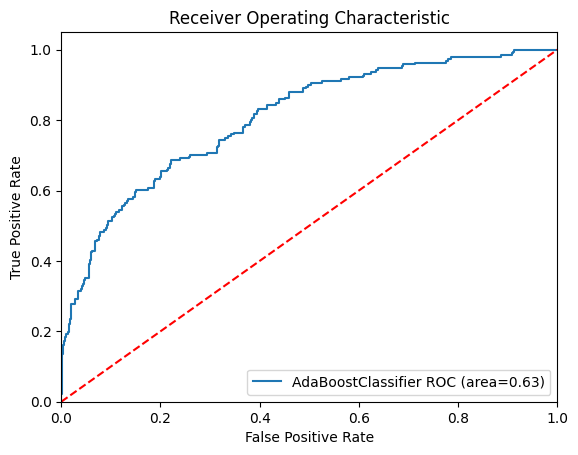

In [33]:
#Plot ROC AUC Curve:
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure()

auc_models = [
{
    "label":"AdaBoostClassifier",
     "model": AdaBoostClassifier(n_estimators=200,learning_rate =1.0,algorithm ='SAMME'),
     "auc": 0.6273
},
]

#create loop through all models:
for algo in auc_models:
    model = algo["model"]
    model.fit(x_train,y_train)
    fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(x_test)[:,1])
    plt.plot(fpr,tpr,label="%s ROC (area=%0.2f)" % (algo["label"],algo["auc"]))
    plt.plot([0,1],[0,1],"r--")
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc="lower right")
    plt.savefig("auc.png")
    plt.show()
